# Dependencies

In [59]:
library(ggsankey)
library(dplyr)

In [2]:
library(openxlsx)

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

# Main

# PBMC

In [60]:
load(file = paste0(gitpath, "data/pbmc_sampleprocessing.RData"))

In [61]:
dim(pbmc_samples)

[1] 321  20

In [62]:
dim(pbmc_samples)

[1] 321  20

In [63]:
head(pbmc_samples)

,sample_id,Shipped,DNAextracted,DNAused,libbatch,librarypassed,Library preparation,libraryyield,captureyield,capbatch,capturepassed,Successful capture,deepseq,Deep sequencing,mysample_id,TCR,TCR analysis,Patient,Tumor,Group
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,330-05,n = 321,6160,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 282,825.6,155.42,190624_M04827_0214_000000000-D6F66,Passed,n = 276,Yes,n = 276,CHP_330_05,Yes,n = 275,CHP_330,OS,Solid
2,329-04,n = 321,11200,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 282,2006.4,155.42,190624_M04827_0214_000000000-D6F66,Passed,n = 276,Yes,n = 276,CHP_329_04,Yes,n = 275,CHP_329,HR ALL,Leukemia
3,331-05,n = 321,3780,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 282,1161.6,162.64,190624_M04827_0214_000000000-D6F66,Passed,n = 276,Yes,n = 276,CHP_331_05,Yes,n = 275,CHP_331,SR ALL,Leukemia
4,331-04,n = 321,9700,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 282,1555.2,162.64,190624_M04827_0214_000000000-D6F66,Passed,n = 276,Yes,n = 276,CHP_331_04,Yes,n = 275,CHP_331,SR ALL,Leukemia
5,338-05,n = 321,1410,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 282,508.8,328.70,190624_M04827_0214_000000000-D6F66,Passed,n = 276,Yes,n = 276,CHP_338_05,Yes,n = 275,CHP_338,AML,Leukemia
6,338-04,n = 321,2460,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 282,883.2,328.70,190624_M04827_0214_000000000-D6F66,Passed,n = 276,Yes,n = 276,CHP_338_04,Yes,n = 275,CHP_338,AML,Leukemia


In [64]:
df <- make_long(pbmc_samples, Shipped, `Library preparation`, `Successful capture`, 
                `Deep sequencing`, `TCR analysis`, Group, Tumor)

In [65]:
tail(df)

x,node,next_x,next_node
<fct>,<chr>,<fct>,<chr>
Library preparation,n = 282,Successful capture,n = 276
Successful capture,n = 276,Deep sequencing,n = 276
Deep sequencing,n = 276,TCR analysis,n = 275
TCR analysis,n = 275,Group,NA
Group,NA,Tumor,NA
Tumor,NA,NA,NA


In [66]:
length(unique(df$node))

[1] 30

In [67]:
library(randomcoloR)
set.seed(5250)
myColors <- distinctColorPalette(30)
names(myColors) <- levels(factor(df$node))

In [68]:
#failed samples color grey
myColors["n = 24"] <- "grey"
myColors["n = 4"] <- "grey"
myColors["n = 39"] <- "grey"

In [69]:
# Tumor types white
myColors[names(myColors) %in% c("ALCL", "BL", "BLL", "DLBCL", "ERMS", "HD", "PMBCL", "NB", "OS", "WILMS",
                               "T-ALL", "SR-ALL", "HR ALL", "HB", "EWS", "CML", "ARMS",
                               "AML", "ALL")] <- "white"

In [70]:
head(df)

x,node,next_x,next_node
<fct>,<chr>,<fct>,<chr>
Shipped,n = 321,Library preparation,n = 282
Library preparation,n = 282,Successful capture,n = 276
Successful capture,n = 276,Deep sequencing,n = 276
Deep sequencing,n = 276,TCR analysis,n = 275
TCR analysis,n = 275,Group,Solid
Group,Solid,Tumor,OS


In [71]:
df$spacing <- NA
df$spacing[ df$x == "Group"] <- "10"

In [72]:
head(df)

x,node,next_x,next_node,spacing
<fct>,<chr>,<fct>,<chr>,<chr>
Shipped,n = 321,Library preparation,n = 282,NA
Library preparation,n = 282,Successful capture,n = 276,NA
Successful capture,n = 276,Deep sequencing,n = 276,NA
Deep sequencing,n = 276,TCR analysis,n = 275,NA
TCR analysis,n = 275,Group,Solid,NA
Group,Solid,Tumor,OS,10


In [73]:
sankey <- ggplot(df, aes(x = x, 
               next_x = next_x, 
               node = node, 
               next_node = next_node,
               fill = node, color = node, 
               label = node)) +
  geom_sankey(flow.alpha = 0.5, na.rm = TRUE) +
  theme_sankey(base_size = 16) +
  geom_sankey_label(size = 5, hjust = 0.5,
                    color = 1, label.size = 0,
                    fill = alpha("white",0), na.rm = TRUE) +
theme(legend.position = "none", 
      axis.title.x = element_blank(),
      axis.text.x = element_text(size = 20, color = "black"),
     plot.title = element_text(hjust = 0.5, size = 30)) +
scale_fill_manual(values = myColors, na.value="white")+
scale_color_manual(values = myColors, na.value="white") + 
labs(title = "PBMC sample processing")

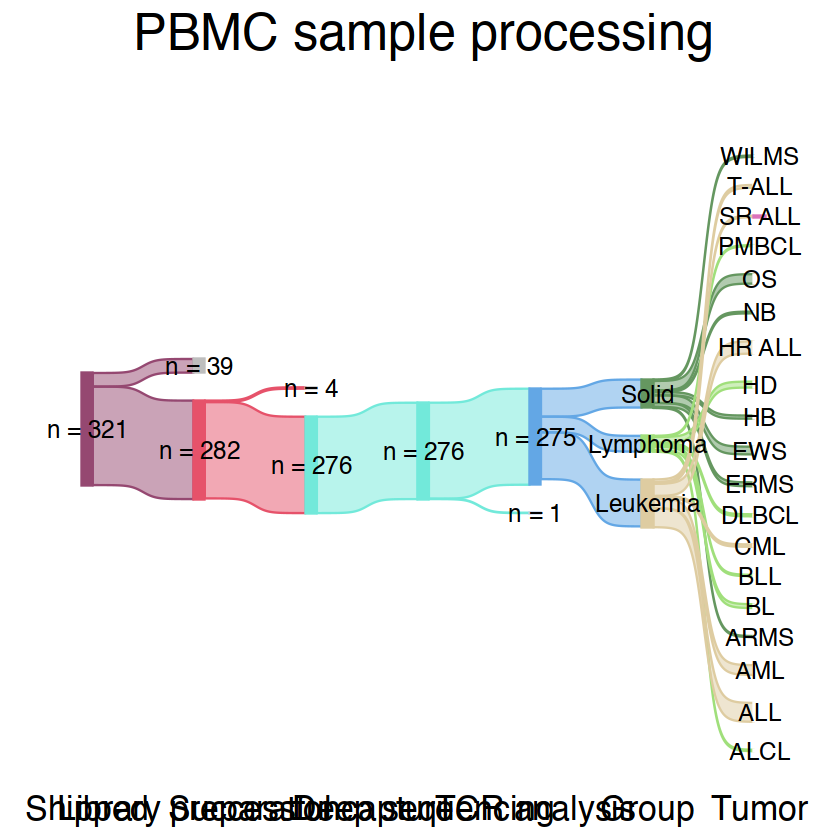

In [74]:
sankey

In [75]:
pdf(paste0(plotpath, "pbmc_sankey.pdf"),
   width = 20, height = 10)
sankey
dev.off()

pdf 
  2

# cfDNA

In [76]:
load(file = paste0(gitpath, "data/cfdna_sampleprocessing.RData"))

In [77]:
summary(cfdna_samples$DNAused)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.002  15.207  20.000  17.321  20.000  20.000 

In [78]:
head(cfdna_samples)

,sample_id,DNA samples,DNAextracted,DNAused,librarypassed,libbatch,Library preparation,libraryyield,DNAforcapture,captureyield,...,capturepassed,Successful capture,deepseq,Deep sequencing,mysample_id,TCR,TCR analysis,Patient,Tumor,Group
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,346-01,n = 316,19.5600,20,Passed,200605_M04827_0389_000000000-D86L3,n = 316,237.12,NA,NA,...,Failed,n = 21,No,NA,CHP_346_01,No,NA,CHP_346,NA,NA
2,348-01,n = 316,14.4000,20,Passed,200605_M04827_0389_000000000-D86L3,n = 316,159.36,159.36,733.4,...,Passed,n = 295,Yes,n = 295,CHP_348_01,Yes,n = 287,CHP_348,OS,Solid
3,348-03,n = 316,24.4944,20,Passed,200605_M04827_0389_000000000-D86L3,n = 316,227.52,227.52,733.4,...,Passed,n = 295,Yes,n = 295,CHP_348_03,Yes,n = 287,CHP_348,OS,Solid
4,343-04,n = 316,56.0000,20,Passed,190730_M04827_0235_000000000-D6WF7,n = 316,291.84,291.84,1052.6,...,Passed,n = 295,Yes,n = 295,CHP_343_04,Yes,n = 287,CHP_343,EWS,Solid
5,329-04,n = 316,40.0768,20,Passed,200605_M04827_0389_000000000-D86L3,n = 316,314.88,314.88,1132.4,...,Passed,n = 295,Yes,n = 295,CHP_329_04,Yes,n = 287,CHP_329,HR ALL,Leukemia
6,331-05,n = 316,82.4000,20,Passed,190730_M04827_0235_000000000-D6WF7,n = 316,811.20,499.13,1565.6,...,Passed,n = 295,Yes,n = 295,CHP_331_05,Yes,n = 287,CHP_331,SR ALL,Leukemia


In [83]:
df <- make_long(cfdna_samples, `DNA samples`, `Library preparation`, `Successful capture`, 
                `Deep sequencing`, `TCR analysis`, Group, Tumor)

In [84]:
length(unique(df$node))

[1] 29

In [85]:
length(levels(factor(df$node)))

[1] 28

In [88]:
library(randomcoloR)
set.seed(5250)
myColors <- distinctColorPalette(28)
names(myColors) <- levels(factor(df$node))

In [89]:
myColors

ALCL       ALL       AML      ARMS        BL       BLL       CML     DLBCL 
"#7178D7" "#DEA349" "#DBE348" "#CDEBBA" "#A19DDD" "#73DF50" "#DD48DB" "#D37DE5" 
     ERMS       EWS        HB        HD    HR ALL  Leukemia  Lymphoma     MS NB 
"#63C1D2" "#76E798" "#E8DBD7" "#B1E3DE" "#E2BCDE" "#DDCE9F" "#C8E07F" "#8F97A3" 
       NB        OS     PMBCL    SR ALL     Solid     T-ALL     WILMS    n = 21 
"#D686A5" "#E854AE" "#DD98E0" "#6DA56D" "#DD9982" "#9733E2" "#C1CDEA" "#63A6E4" 
  n = 287   n = 295   n = 316     n = 8 
"#70EAD6" "#E65269" "#964272" "#744EC8"

In [90]:
#failed samples color grey
myColors["n = 21"] <- "grey"
myColors["n = 16"] <- "grey"

In [91]:
# Tumor types white
myColors[names(myColors) %in% c("ALCL", "BL", "BLL", "DLBCL", "ERMS", "HD", "PMBCL", "NB", "OS", "WILMS",
                               "T-ALL", "SR-ALL", "HR ALL", "HB", "EWS", "CML", "ARMS",
                               "AML", "ALL")] <- "white"

In [92]:
head(df)

x,node,next_x,next_node
<fct>,<chr>,<fct>,<chr>
DNA samples,n = 316,Library preparation,n = 316
Library preparation,n = 316,Successful capture,n = 21
Successful capture,n = 21,Deep sequencing,NA
Deep sequencing,NA,TCR analysis,NA
TCR analysis,NA,Group,NA
Group,NA,Tumor,NA


In [93]:
df$spacing <- NA
df$spacing[ df$x == "Group"] <- "10"

In [94]:
head(df)

x,node,next_x,next_node,spacing
<fct>,<chr>,<fct>,<chr>,<chr>
DNA samples,n = 316,Library preparation,n = 316,NA
Library preparation,n = 316,Successful capture,n = 21,NA
Successful capture,n = 21,Deep sequencing,NA,NA
Deep sequencing,NA,TCR analysis,NA,NA
TCR analysis,NA,Group,NA,NA
Group,NA,Tumor,NA,10


In [95]:
sankey <- ggplot(df, aes(x = x, 
               next_x = next_x, 
               node = node, 
               next_node = next_node,
               fill = node, color = node, 
               label = node)) +
  geom_sankey(flow.alpha = 0.5, na.rm = TRUE) +
  theme_sankey(base_size = 16) +
  geom_sankey_label(size = 5, hjust = 0.5,
                    color = 1, label.size = 0,
                    fill = alpha("white",0), na.rm = TRUE) +
theme(legend.position = "none", 
      axis.title.x = element_blank(),
      axis.text.x = element_text(size = 20, color = "black"),
     plot.title = element_text(hjust = 0.5, size = 30)) +
scale_fill_manual(values = myColors, na.value="white")+
scale_color_manual(values = myColors, na.value="white") + 
labs(title = "cfDNA sample processing")

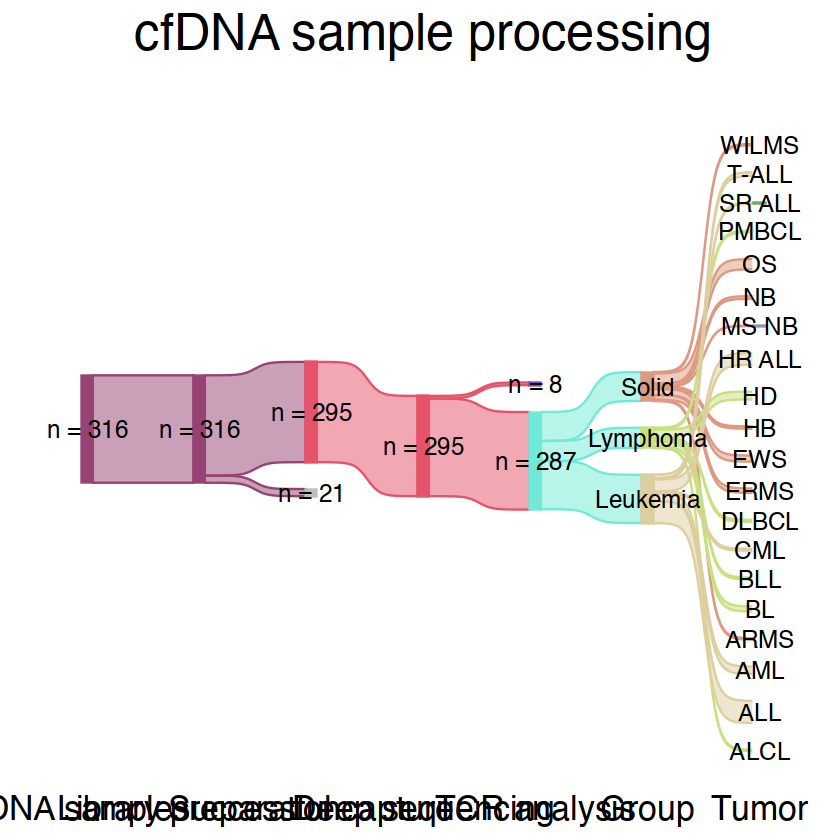

In [96]:
sankey

In [97]:
pdf(paste0(plotpath, "cfdna_sankey.pdf"),
   width = 20, height = 10)
sankey
dev.off()

pdf 
  2